In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''IFS (Iterated Fractal System) algorithm '''

def create_fractal(fractals_dict, fractal_name, n_iter):
  x, y = [], []
  x_new, y_new = 0, 0

  specific_dict = fractals_dict[f"{fractal_name}"]
  m_param = specific_dict["m"]
  prob = specific_dict["prob"]

  for i in range(n_iter):
    m_row = np.random.choice(len(prob), 1, p=prob)
    m_chosen = m_param[m_row[0]]

    x_prime = m_chosen[0] * x_new + m_chosen[1] * y_new + m_chosen[4]
    y_prime = m_chosen[2] * x_new + m_chosen[3] * y_new + m_chosen[5]

    x_new = x_prime
    y_new = y_prime

    x.append(x_prime)
    y.append(y_prime)

  return x, y


def plot_fractal(x, y):
    fig, ax = plt.subplots()
    ax.set_facecolor('black')

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='both', which='both', length=0)
    plt.scatter(x, y, s=1, marker="o", lw=0, c="green")

    ax.set_xticks([])
    ax.set_yticks([])

    return fig, ax


'''r is a grid parameter, the bigger r is, the finer the grid becomes
N is a number of self-similar objects'''

def plot_Nr_vs_r(x, y, r_max, file_name):
  Nr = []
  for r in np.arange(r_max) + 1:
    Nr_sum = 0
    h = np.histogram2d(x, y, bins=(2**r, 2**r))
    matrix = h[0]
    Nr_sum = np.count_nonzero(matrix)
    Nr.append(Nr_sum)

  '''perform a linear fit of y = a * x + b'''
  '''parameter variance on a diagonal of the returned matrix'''
  def calculate_fractal_dimension(x, y):
    (a, b), V = np.polyfit(x, y, deg=1, cov=True)
    ua = np.sqrt(V[0][0])
    ub = np.sqrt(V[1][1])
    return a, b, ua, ub

  a, b, ua, ub = calculate_fractal_dimension((np.arange(r_max) + 1), np.log(Nr))
  D = round(a / np.log(2), 3)
  uD = round(ua / np.log(2), 3)
  plt.plot(np.arange(r_max) + 1, (np.arange(r_max) + 1) * a +  b, 'g', label=f'$D_f = ({D} \pm {uD})$')
  plt.scatter(np.arange(r_max) + 1, np.log(Nr), c='green')
  plt.title(f'{file_name}')
  plt.xlabel('r')
  plt.ylabel(r'$logN_r$')
  plt.legend()
  plt.savefig(f'/content/gdrive/MyDrive/5SEM/SIM/images/logNr_vs_r_{file_name}.jpg')
  plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[]

In [ ]:
N = 10000


fractals = {"sierpinski": {"prob": np.array([1/3, 1/3, 1/3]),
                           "m": np.array([[0.5, 0, 0, 0.5, 0.25, np.sqrt(3.) / 4],
                                          [0.5, 0, 0, 0.5, 0, 0],
                                          [0.5, 0, 0, 0.5, 0.5, 0]])},
            "fern": {"prob": np.array([0.02, 0.09, 0.10, 0.79]),
                     "m": np.array([[0.001, 0.0, 0.0, 0.16, 0.0, 0.0],
                                    [-0.15, 0.28, 0.26, 0.24, 0.0, 0.44],
                                    [0.2, -0.26, 0.23, 0.22, 0.0, 1.6],
                                    [0.85, 0.04, -0.04, 0.85, 0.0, 1.6]])},
            "dragon": {"prob": np.array([0.787473, 0.212527]),
                       "m": np.array([[0.824074, 0.281482, -0.212346, 0.864198, -1.882290, -0.110607],
                                      [0.088272, 0.520988, -0.463889, -0.377778, 0.785360, 8.095795]])},
            "levy": {"prob": np.array([1/2, 1/2]),
                     "m": np.array([[0.5, -0.5, 0.5, 0.5, 0.0, 0.0],
                                    [0.5, 0.5, -0.5, 0.5, 0.5, 0.5]])
                     }}

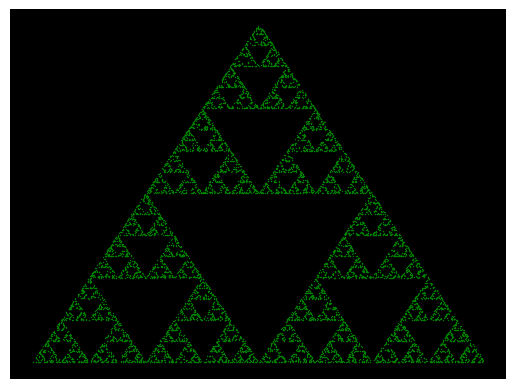

In [ ]:
x_sierpinski, y_sierpinski = (create_fractal(fractals, "sierpinski", N))
fig, ax = plot_fractal(x_sierpinski, y_sierpinski)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/sierpinski_fractal.jpg')
plt.show()

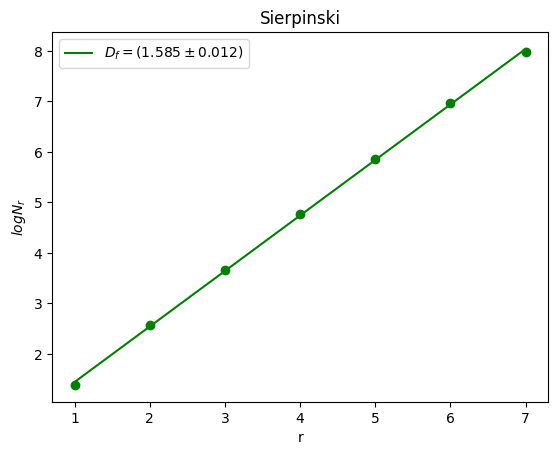

In [ ]:
plot_Nr_vs_r(x_sierpinski, y_sierpinski, 7, "Sierpinski")

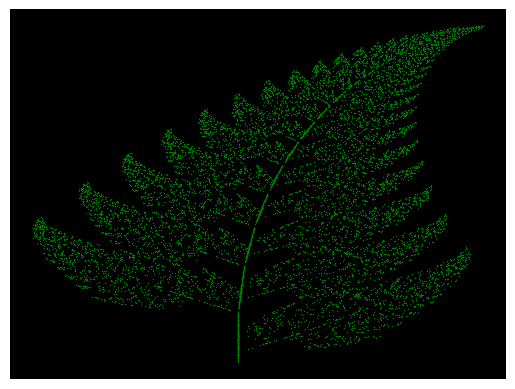

In [ ]:
x_fern, y_fern = (create_fractal(fractals, "fern", N))
fig, ax = plot_fractal(x_fern, y_fern)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/fern_fractal.jpg')
plt.show()

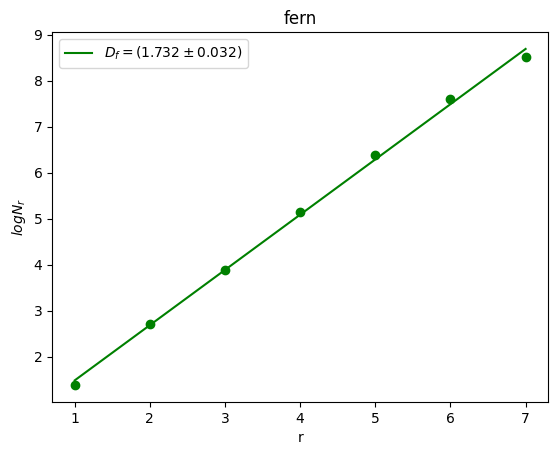

In [ ]:
plot_Nr_vs_r(x_fern, y_fern, 7, "fern")

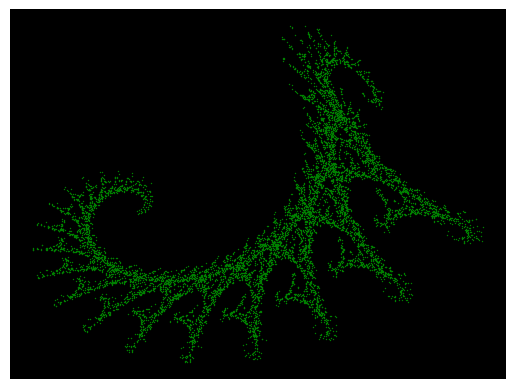

In [ ]:
x_dragon, y_dragon = (create_fractal(fractals, "dragon", N))
fig, ax = plot_fractal(x_dragon, y_dragon)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/dragon_fractal.jpg')
plt.show()

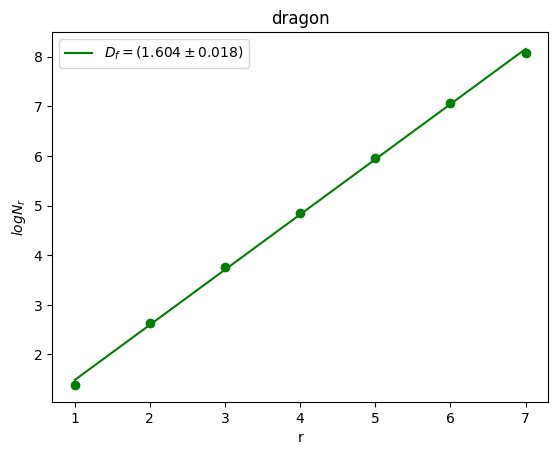

In [ ]:
plot_Nr_vs_r(x_dragon, y_dragon, 7, "dragon")

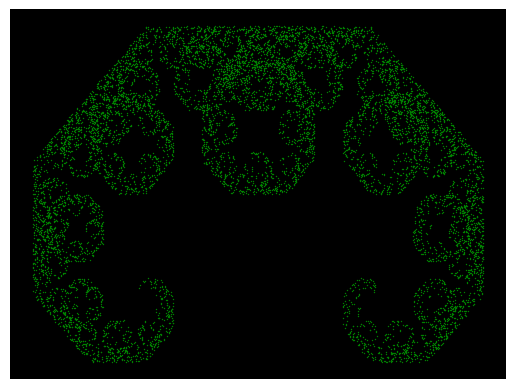

In [ ]:
x_levy, y_levy = (create_fractal(fractals, "levy", N))
fig, ax = plot_fractal(x_levy, y_levy)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/levy_fractal.jpg')
plt.show()

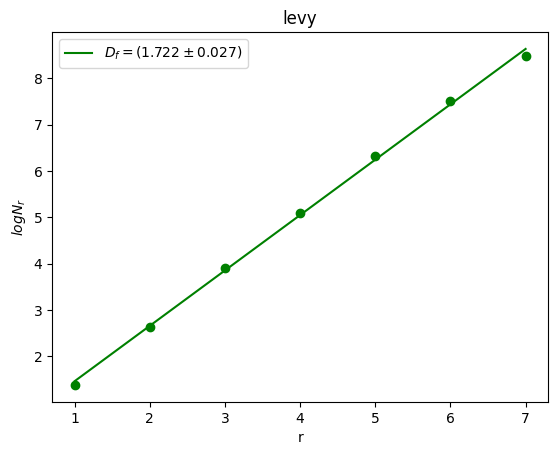

In [ ]:
plot_Nr_vs_r(x_levy, y_levy, 7, "levy")